In [1]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [2]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [3]:
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

x = np.array([1, 2, 3])
# Remodelar la entrada al tamaño de muestra requerido x pasos_de_tiempo x características
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)


m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by

print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)

print("Predicción de la red ", y_pred_model)
print("Prediccion debida al procesamiento ", o3)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


wx =  [[-0.2707466 -1.0477787]]  wh =  [[ 0.7161139  -0.69798344]
 [ 0.69798344  0.7161139 ]]  bh =  [0. 0.]  wy = [[-0.7969008]
 [ 0.5348104]] by =  [0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
h1 =  [[-0.27074659 -1.04777873]] h2 =  [[-1.46671078 -2.65690975]] h3 =  [[-3.7170508 -4.0222464]]
Predicción de la red  [[0.81098175]]
Prediccion debida al procesamiento  [[0.81098148]]


In [4]:
# El parámetro split_percent define la proporción de ejemplos de entrenamiento
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Punto para dividir los datos en entrenamiento y prueba
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [5]:

# Preparar la entrada X y el objetivo Y
def get_XY(dat, time_steps):
    # Indices del arreglo objetivo
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Preparar X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


187/187 - 2s - 13ms/step - loss: 0.0355
Epoch 2/20
187/187 - 1s - 3ms/step - loss: 0.0108
Epoch 3/20
187/187 - 1s - 3ms/step - loss: 0.0073
Epoch 4/20
187/187 - 1s - 3ms/step - loss: 0.0061
Epoch 5/20
187/187 - 1s - 3ms/step - loss: 0.0052
Epoch 6/20
187/187 - 1s - 3ms/step - loss: 0.0049
Epoch 7/20
187/187 - 1s - 6ms/step - loss: 0.0046
Epoch 8/20
187/187 - 1s - 3ms/step - loss: 0.0042
Epoch 9/20
187/187 - 1s - 3ms/step - loss: 0.0041
Epoch 10/20
187/187 - 1s - 3ms/step - loss: 0.0040
Epoch 11/20
187/187 - 1s - 4ms/step - loss: 0.0039
Epoch 12/20
187/187 - 1s - 3ms/step - loss: 0.0038
Epoch 13/20
187/187 - 1s - 3ms/step - loss: 0.0037
Epoch 14/20
187/187 - 1s - 3ms/step - loss: 0.0037
Epoch 15/20
187/187 - 1s - 3ms/step - loss: 0.0036
Epoch 16/20
187/187 - 1s - 4ms/step - loss: 0.0036
Epoch 17/20
187/187 - 1s - 7ms/step - loss: 0.0036
Epoch 18/20
187/187 - 1s - 3ms/step - loss: 0.0036
Epoch 19/20
187/187 - 1s - 3ms/step - loss: 0.0036
Epoch 20/20
187/187 - 1s - 6ms/step - loss: 0.0034

In [6]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Entrenamiento RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Entrenamiento RMSE: 0.058 RMSE
Test RMSE: 0.087 RMSE


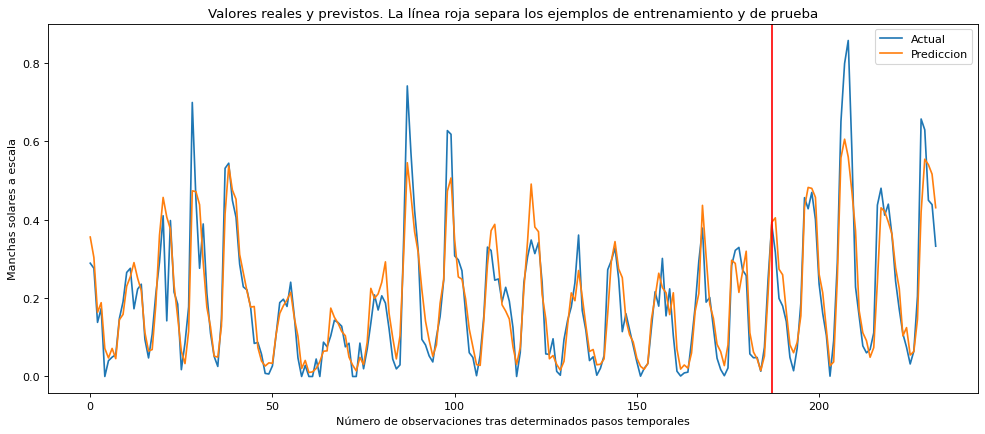

In [7]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Prediccion'])
    plt.xlabel('Número de observaciones tras determinados pasos temporales')
    plt.ylabel('Manchas solares a escala')
    plt.title('Valores reales y previstos. La línea roja separa los ejemplos de entrenamiento y de prueba')
plot_result(trainY, testY, train_predict, test_predict)
print_error(trainY, testY, train_predict, test_predict)

Epoch 1/30


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 - 3s - 13ms/step - loss: 0.0137
Epoch 2/30
225/225 - 2s - 7ms/step - loss: 0.0082
Epoch 3/30
225/225 - 1s - 4ms/step - loss: 0.0063
Epoch 4/30
225/225 - 1s - 5ms/step - loss: 0.0053
Epoch 5/30
225/225 - 1s - 5ms/step - loss: 0.0047
Epoch 6/30
225/225 - 1s - 4ms/step - loss: 0.0045
Epoch 7/30
225/225 - 1s - 4ms/step - loss: 0.0042
Epoch 8/30
225/225 - 1s - 3ms/step - loss: 0.0041
Epoch 9/30
225/225 - 1s - 3ms/step - loss: 0.0040
Epoch 10/30
225/225 - 1s - 3ms/step - loss: 0.0038
Epoch 11/30
225/225 - 1s - 3ms/step - loss: 0.0037
Epoch 12/30
225/225 - 1s - 3ms/step - loss: 0.0038
Epoch 13/30
225/225 - 1s - 3ms/step - loss: 0.0037
Epoch 14/30
225/225 - 1s - 3ms/step - loss: 0.0036
Epoch 15/30
225/225 - 1s - 3ms/step - loss: 0.0037
Epoch 16/30
225/225 - 1s - 3ms/step - loss: 0.0037
Epoch 17/30
225/225 - 1s - 3ms/step - loss: 0.0036
Epoch 18/30
225/225 - 1s - 3ms/step - loss: 0.0037
Epoch 19/30
225/225 - 1s - 3ms/step - loss: 0.0036
Epoch 20/30
225/225 - 1s - 4ms/step - loss: 0.0036

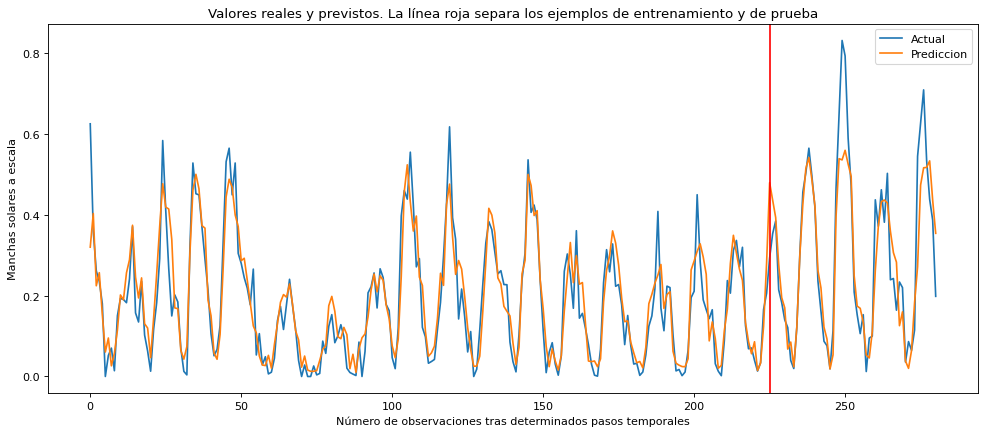

In [8]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)


Epoch 1/35


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 - 2s - 11ms/step - loss: 0.0142
Epoch 2/35
225/225 - 1s - 3ms/step - loss: 0.0086
Epoch 3/35
225/225 - 1s - 3ms/step - loss: 0.0072
Epoch 4/35
225/225 - 1s - 3ms/step - loss: 0.0070
Epoch 5/35
225/225 - 1s - 4ms/step - loss: 0.0067
Epoch 6/35
225/225 - 1s - 3ms/step - loss: 0.0064
Epoch 7/35
225/225 - 1s - 3ms/step - loss: 0.0060
Epoch 8/35
225/225 - 1s - 3ms/step - loss: 0.0057
Epoch 9/35
225/225 - 1s - 3ms/step - loss: 0.0053
Epoch 10/35
225/225 - 1s - 3ms/step - loss: 0.0051
Epoch 11/35
225/225 - 1s - 3ms/step - loss: 0.0048
Epoch 12/35
225/225 - 1s - 3ms/step - loss: 0.0046
Epoch 13/35
225/225 - 1s - 3ms/step - loss: 0.0044
Epoch 14/35
225/225 - 1s - 3ms/step - loss: 0.0044
Epoch 15/35
225/225 - 1s - 3ms/step - loss: 0.0042
Epoch 16/35
225/225 - 1s - 3ms/step - loss: 0.0041
Epoch 17/35
225/225 - 1s - 5ms/step - loss: 0.0041
Epoch 18/35
225/225 - 1s - 5ms/step - loss: 0.0039
Epoch 19/35
225/225 - 1s - 4ms/step - loss: 0.0040
Epoch 20/35
225/225 - 1s - 4ms/step - loss: 0.0039

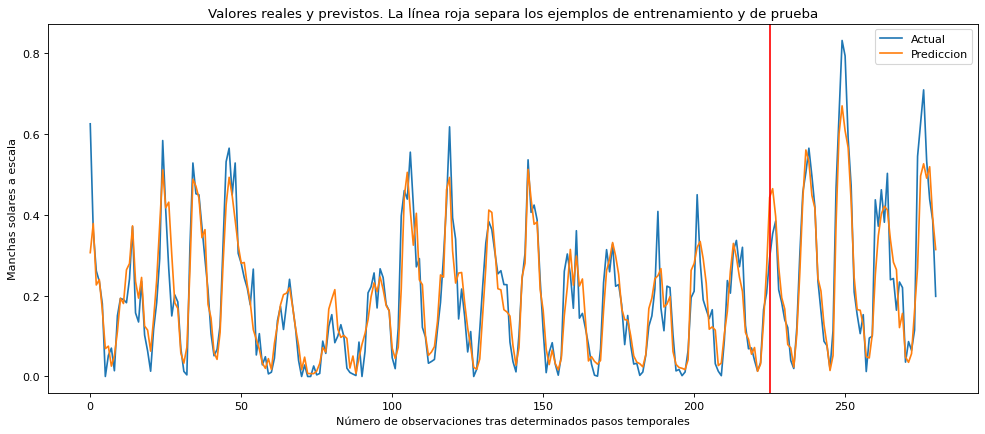

In [9]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=35, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/25


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 - 4s - 18ms/step - loss: 0.0478
Epoch 2/25
225/225 - 1s - 3ms/step - loss: 0.0266
Epoch 3/25
225/225 - 2s - 7ms/step - loss: 0.0217
Epoch 4/25
225/225 - 1s - 5ms/step - loss: 0.0187
Epoch 5/25
225/225 - 2s - 7ms/step - loss: 0.0168
Epoch 6/25
225/225 - 1s - 5ms/step - loss: 0.0151
Epoch 7/25
225/225 - 2s - 8ms/step - loss: 0.0141
Epoch 8/25
225/225 - 1s - 4ms/step - loss: 0.0133
Epoch 9/25
225/225 - 1s - 4ms/step - loss: 0.0127
Epoch 10/25
225/225 - 1s - 3ms/step - loss: 0.0121
Epoch 11/25
225/225 - 1s - 3ms/step - loss: 0.0117
Epoch 12/25
225/225 - 1s - 3ms/step - loss: 0.0114
Epoch 13/25
225/225 - 1s - 3ms/step - loss: 0.0110
Epoch 14/25
225/225 - 1s - 3ms/step - loss: 0.0109
Epoch 15/25
225/225 - 1s - 3ms/step - loss: 0.0105
Epoch 16/25
225/225 - 1s - 4ms/step - loss: 0.0104
Epoch 17/25
225/225 - 1s - 3ms/step - loss: 0.0101
Epoch 18/25
225/225 - 1s - 4ms/step - loss: 0.0102
Epoch 19/25
225/225 - 1s - 6ms/step - loss: 0.0100
Epoch 20/25
225/225 - 1s - 3ms/step - loss: 0.0099

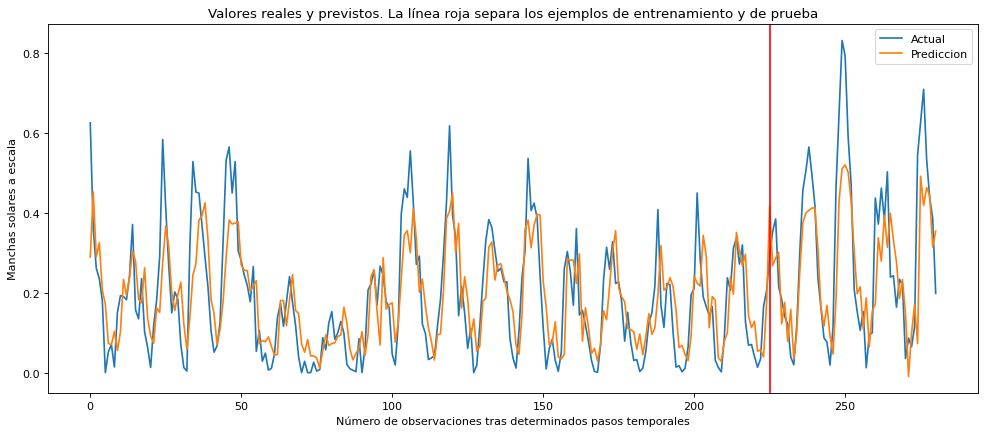

In [10]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/25


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 - 4s - 16ms/step - loss: 0.0217
Epoch 2/25
225/225 - 1s - 4ms/step - loss: 0.0077
Epoch 3/25
225/225 - 1s - 3ms/step - loss: 0.0060
Epoch 4/25
225/225 - 2s - 7ms/step - loss: 0.0057
Epoch 5/25
225/225 - 1s - 5ms/step - loss: 0.0056
Epoch 6/25
225/225 - 1s - 4ms/step - loss: 0.0052
Epoch 7/25
225/225 - 1s - 4ms/step - loss: 0.0048
Epoch 8/25
225/225 - 1s - 3ms/step - loss: 0.0050
Epoch 9/25
225/225 - 1s - 4ms/step - loss: 0.0048
Epoch 10/25
225/225 - 1s - 4ms/step - loss: 0.0046
Epoch 11/25
225/225 - 1s - 3ms/step - loss: 0.0048
Epoch 12/25
225/225 - 1s - 3ms/step - loss: 0.0045
Epoch 13/25
225/225 - 1s - 3ms/step - loss: 0.0045
Epoch 14/25
225/225 - 1s - 3ms/step - loss: 0.0042
Epoch 15/25
225/225 - 1s - 5ms/step - loss: 0.0042
Epoch 16/25
225/225 - 1s - 4ms/step - loss: 0.0041
Epoch 17/25
225/225 - 1s - 3ms/step - loss: 0.0041
Epoch 18/25
225/225 - 1s - 3ms/step - loss: 0.0039
Epoch 19/25
225/225 - 1s - 3ms/step - loss: 0.0039
Epoch 20/25
225/225 - 1s - 3ms/step - loss: 0.0041

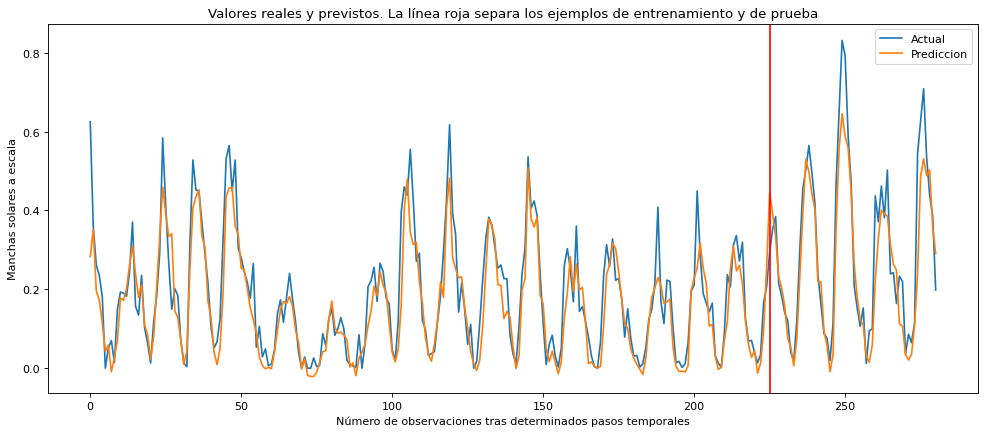

In [11]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/35


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 - 3s - 13ms/step - loss: 0.0836
Epoch 2/35
225/225 - 1s - 6ms/step - loss: 0.0138
Epoch 3/35
225/225 - 1s - 3ms/step - loss: 0.0044
Epoch 4/35
225/225 - 1s - 4ms/step - loss: 0.0041
Epoch 5/35
225/225 - 1s - 4ms/step - loss: 0.0040
Epoch 6/35
225/225 - 1s - 3ms/step - loss: 0.0040
Epoch 7/35
225/225 - 1s - 3ms/step - loss: 0.0039
Epoch 8/35
225/225 - 1s - 3ms/step - loss: 0.0041
Epoch 9/35
225/225 - 1s - 3ms/step - loss: 0.0041
Epoch 10/35
225/225 - 1s - 3ms/step - loss: 0.0041
Epoch 11/35
225/225 - 1s - 3ms/step - loss: 0.0041
Epoch 12/35
225/225 - 1s - 3ms/step - loss: 0.0040
Epoch 13/35
225/225 - 1s - 3ms/step - loss: 0.0042
Epoch 14/35
225/225 - 1s - 3ms/step - loss: 0.0039
Epoch 15/35
225/225 - 1s - 3ms/step - loss: 0.0037
Epoch 16/35
225/225 - 1s - 3ms/step - loss: 0.0039
Epoch 17/35
225/225 - 1s - 3ms/step - loss: 0.0039
Epoch 18/35
225/225 - 1s - 3ms/step - loss: 0.0039
Epoch 19/35
225/225 - 1s - 6ms/step - loss: 0.0039
Epoch 20/35
225/225 - 1s - 3ms/step - loss: 0.0040

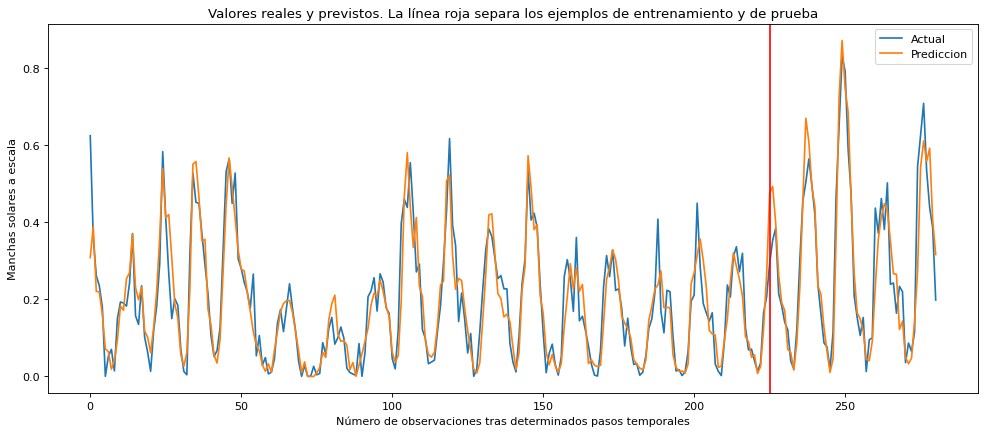

In [12]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['linear', 'linear'])

model.fit(trainX, trainY, epochs=35, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/25


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


225/225 - 2s - 11ms/step - loss: 0.0352
Epoch 2/25
225/225 - 1s - 3ms/step - loss: 0.0221
Epoch 3/25
225/225 - 1s - 3ms/step - loss: 0.0186
Epoch 4/25
225/225 - 1s - 3ms/step - loss: 0.0153
Epoch 5/25
225/225 - 1s - 2ms/step - loss: 0.0127
Epoch 6/25
225/225 - 1s - 3ms/step - loss: 0.0108
Epoch 7/25
225/225 - 1s - 3ms/step - loss: 0.0097
Epoch 8/25
225/225 - 1s - 4ms/step - loss: 0.0095
Epoch 9/25
225/225 - 1s - 4ms/step - loss: 0.0091
Epoch 10/25
225/225 - 1s - 6ms/step - loss: 0.0089
Epoch 11/25
225/225 - 1s - 6ms/step - loss: 0.0087
Epoch 12/25
225/225 - 1s - 5ms/step - loss: 0.0084
Epoch 13/25
225/225 - 2s - 11ms/step - loss: 0.0082
Epoch 14/25
225/225 - 1s - 4ms/step - loss: 0.0082
Epoch 15/25
225/225 - 1s - 4ms/step - loss: 0.0078
Epoch 16/25
225/225 - 1s - 4ms/step - loss: 0.0077
Epoch 17/25
225/225 - 1s - 3ms/step - loss: 0.0075
Epoch 18/25
225/225 - 1s - 4ms/step - loss: 0.0073
Epoch 19/25
225/225 - 1s - 4ms/step - loss: 0.0070
Epoch 20/25
225/225 - 1s - 3ms/step - loss: 0.006

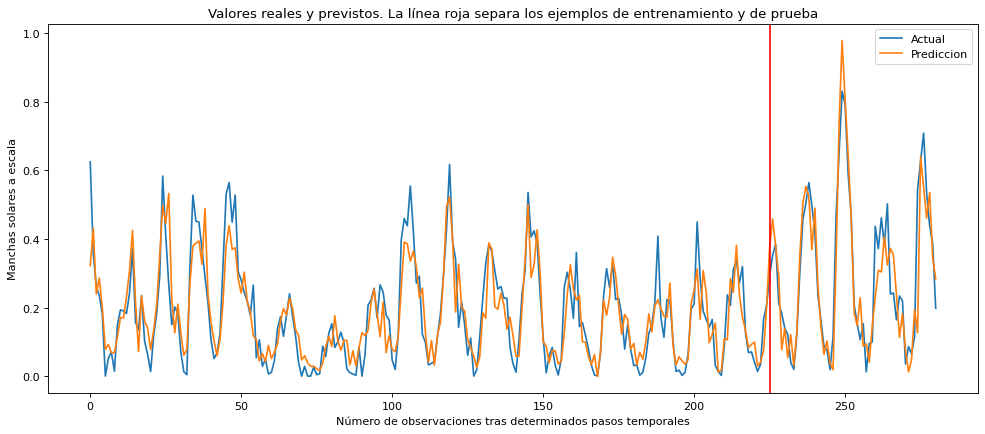

In [13]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['linear', 'linear'])

model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

## Mis cambios

Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 377ms/step - loss: 0.0185
Epoch 2/100
7/7 - 0s - 11ms/step - loss: 0.0135
Epoch 3/100
7/7 - 0s - 10ms/step - loss: 0.0108
Epoch 4/100
7/7 - 0s - 10ms/step - loss: 0.0097
Epoch 5/100
7/7 - 0s - 24ms/step - loss: 0.0089
Epoch 6/100
7/7 - 0s - 10ms/step - loss: 0.0081
Epoch 7/100
7/7 - 0s - 10ms/step - loss: 0.0075
Epoch 8/100
7/7 - 0s - 10ms/step - loss: 0.0070
Epoch 9/100
7/7 - 0s - 10ms/step - loss: 0.0065
Epoch 10/100
7/7 - 0s - 10ms/step - loss: 0.0061
Epoch 11/100
7/7 - 0s - 10ms/step - loss: 0.0058
Epoch 12/100
7/7 - 0s - 10ms/step - loss: 0.0055
Epoch 13/100
7/7 - 0s - 10ms/step - loss: 0.0053
Epoch 14/100
7/7 - 0s - 11ms/step - loss: 0.0050
Epoch 15/100
7/7 - 0s - 21ms/step - loss: 0.0049
Epoch 16/100
7/7 - 0s - 13ms/step - loss: 0.0047
Epoch 17/100
7/7 - 0s - 25ms/step - loss: 0.0046
Epoch 18/100
7/7 - 0s - 13ms/step - loss: 0.0044
Epoch 19/100
7/7 - 0s - 11ms/step - loss: 0.0043
Epoch 20/100
7/7 - 0s - 11ms/step - loss: 0.0042
Epoch 21/100
7/7 - 0s - 11ms/step - loss

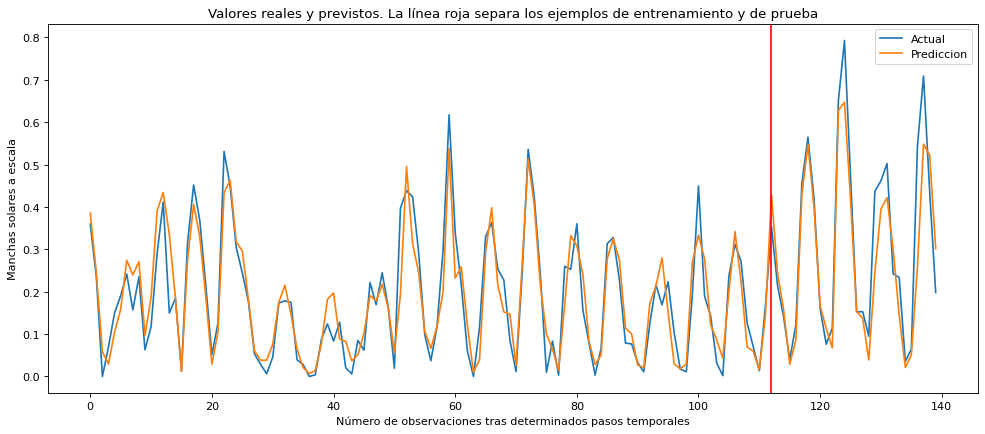

In [31]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 20
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=6, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'relu'])

model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 - 2s - 151ms/step - loss: 0.0138
Epoch 2/100
15/15 - 0s - 7ms/step - loss: 0.0079
Epoch 3/100
15/15 - 0s - 6ms/step - loss: 0.0071
Epoch 4/100
15/15 - 0s - 6ms/step - loss: 0.0067
Epoch 5/100
15/15 - 0s - 6ms/step - loss: 0.0064
Epoch 6/100
15/15 - 0s - 6ms/step - loss: 0.0062
Epoch 7/100
15/15 - 0s - 11ms/step - loss: 0.0060
Epoch 8/100
15/15 - 0s - 6ms/step - loss: 0.0058
Epoch 9/100
15/15 - 0s - 11ms/step - loss: 0.0056
Epoch 10/100
15/15 - 0s - 6ms/step - loss: 0.0055
Epoch 11/100
15/15 - 0s - 11ms/step - loss: 0.0054
Epoch 12/100
15/15 - 0s - 6ms/step - loss: 0.0052
Epoch 13/100
15/15 - 0s - 11ms/step - loss: 0.0051
Epoch 14/100
15/15 - 0s - 6ms/step - loss: 0.0050
Epoch 15/100
15/15 - 0s - 6ms/step - loss: 0.0048
Epoch 16/100
15/15 - 0s - 6ms/step - loss: 0.0047
Epoch 17/100
15/15 - 0s - 6ms/step - loss: 0.0047
Epoch 18/100
15/15 - 0s - 6ms/step - loss: 0.0046
Epoch 19/100
15/15 - 0s - 6ms/step - loss: 0.0045
Epoch 20/100
15/15 - 0s - 6ms/step - loss: 0.0045
Epoch 21/100
15

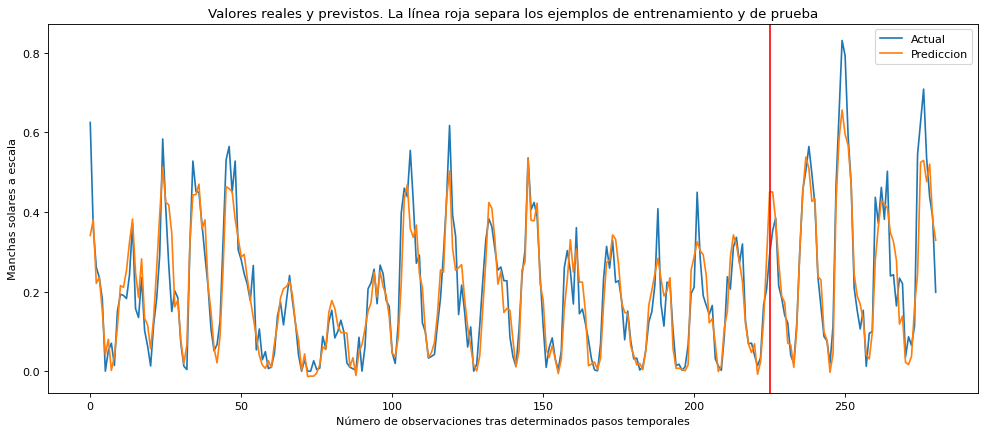

In [24]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=5, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 - 3s - 370ms/step - loss: 0.0194
Epoch 2/100
7/7 - 0s - 11ms/step - loss: 0.0157
Epoch 3/100
7/7 - 0s - 10ms/step - loss: 0.0135
Epoch 4/100
7/7 - 0s - 10ms/step - loss: 0.0118
Epoch 5/100
7/7 - 0s - 10ms/step - loss: 0.0104
Epoch 6/100
7/7 - 0s - 11ms/step - loss: 0.0094
Epoch 7/100
7/7 - 0s - 10ms/step - loss: 0.0084
Epoch 8/100
7/7 - 0s - 11ms/step - loss: 0.0076
Epoch 9/100
7/7 - 0s - 11ms/step - loss: 0.0071
Epoch 10/100
7/7 - 0s - 10ms/step - loss: 0.0065
Epoch 11/100
7/7 - 0s - 11ms/step - loss: 0.0060
Epoch 12/100
7/7 - 0s - 11ms/step - loss: 0.0055
Epoch 13/100
7/7 - 0s - 11ms/step - loss: 0.0052
Epoch 14/100
7/7 - 0s - 11ms/step - loss: 0.0049
Epoch 15/100
7/7 - 0s - 12ms/step - loss: 0.0046
Epoch 16/100
7/7 - 0s - 12ms/step - loss: 0.0044
Epoch 17/100
7/7 - 0s - 10ms/step - loss: 0.0043
Epoch 18/100
7/7 - 0s - 11ms/step - loss: 0.0041
Epoch 19/100
7/7 - 0s - 11ms/step - loss: 0.0041
Epoch 20/100
7/7 - 0s - 10ms/step - loss: 0.0040
Epoch 21/100
7/7 - 0s - 11ms/step - loss

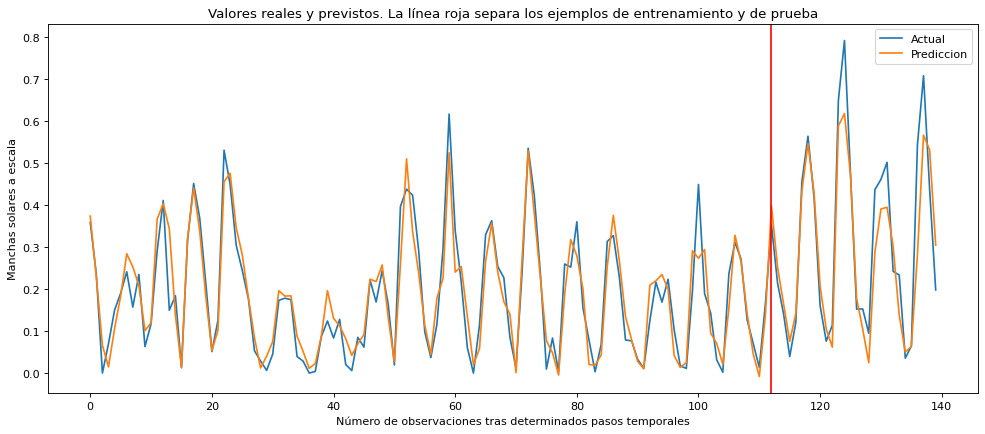

In [26]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 20
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=6, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)

Epoch 1/100


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 - 2s - 79ms/step - loss: 0.0350
Epoch 2/100
29/29 - 0s - 4ms/step - loss: 0.0171
Epoch 3/100
29/29 - 0s - 4ms/step - loss: 0.0108
Epoch 4/100
29/29 - 0s - 4ms/step - loss: 0.0079
Epoch 5/100
29/29 - 0s - 14ms/step - loss: 0.0063
Epoch 6/100
29/29 - 0s - 11ms/step - loss: 0.0055
Epoch 7/100
29/29 - 0s - 4ms/step - loss: 0.0051
Epoch 8/100
29/29 - 0s - 10ms/step - loss: 0.0049
Epoch 9/100
29/29 - 0s - 12ms/step - loss: 0.0046
Epoch 10/100
29/29 - 0s - 6ms/step - loss: 0.0046
Epoch 11/100
29/29 - 0s - 5ms/step - loss: 0.0045
Epoch 12/100
29/29 - 0s - 14ms/step - loss: 0.0044
Epoch 13/100
29/29 - 0s - 5ms/step - loss: 0.0044
Epoch 14/100
29/29 - 0s - 4ms/step - loss: 0.0044
Epoch 15/100
29/29 - 0s - 4ms/step - loss: 0.0045
Epoch 16/100
29/29 - 0s - 12ms/step - loss: 0.0044
Epoch 17/100
29/29 - 0s - 7ms/step - loss: 0.0044
Epoch 18/100
29/29 - 0s - 5ms/step - loss: 0.0044
Epoch 19/100
29/29 - 0s - 5ms/step - loss: 0.0043
Epoch 20/100
29/29 - 0s - 7ms/step - loss: 0.0043
Epoch 21/100
2

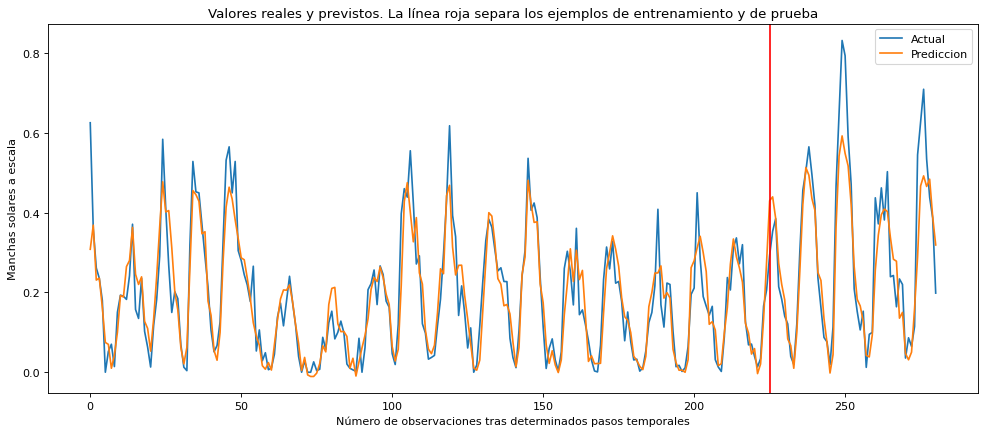

In [41]:
train_data, test_data, data = get_train_test(sunspots_url)

time_steps = 10
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=2, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=100, batch_size=8, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)